# 互评作业三：分类，预测与聚类
github:https://github.com/ckqaq/dm2021_hw/blob/main/assignment3/

In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
data = pd.read_csv('./hotel_bookings.csv')
data_copy = data.copy(deep=True)

In [3]:
data_copy.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
data_copy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 1. 数据清洗
- 空值填充。针对离散数据用众数填充，
- 删除无效信息列agent及company
- 构建工作日过夜数
- 转换object数据为int

In [6]:
data_copy['children'].fillna(data_copy['children'].mode()[0],inplace=True)
data_copy['country'].fillna(data_copy['country'].mode()[0],inplace=True)

In [7]:
# 删除agent和company列
drop_colums = ['agent', 'company']
data_copy.drop(drop_colums, axis=1, inplace=True)

In [8]:
# 构建工作日过夜数
data_copy['stays_in_weekday_nights'] = data_copy['stays_in_week_nights']-data_copy['stays_in_weekend_nights']

In [9]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
# object转换为int
label = LabelEncoder()
data_copy['hotel_code'] = label.fit_transform(data_copy['hotel'])
data_copy['meal_code'] = label.fit_transform(data_copy['meal'])
data_copy['country_code'] = label.fit_transform(data_copy['country'])
data_copy['market_segment_code'] = label.fit_transform(data_copy['market_segment'])
data_copy['distribution_channel_code'] = label.fit_transform(data_copy['distribution_channel'])
data_copy['reserved_room_type_code'] = label.fit_transform(data_copy['reserved_room_type'])
data_copy['assigned_room_type_code'] = label.fit_transform(data_copy['assigned_room_type'])
data_copy['deposit_type_code'] = label.fit_transform(data_copy['deposit_type'])
data_copy['customer_type_code'] = label.fit_transform(data_copy['customer_type'])
data_copy['reservation_status_code'] = label.fit_transform(data_copy['reservation_status'])
data_copy['reservation_status_date_code'] = label.fit_transform(data_copy['reservation_status_date'])

In [11]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 2.城市酒店和假日酒店预订需求和入住率比较
### 2.1 预定需求
一年中最佳预订酒店时间；
利用Logistic预测酒店预订。

In [12]:
# 比较城市酒店与假日酒店的预订需求，即为预订率（预订总人数/总的酒店数）
people = ['adults','children','babies']
num_booking_ch = data_copy.groupby(by='hotel')[people].sum().sum(axis=1)[0]
num_ch = data_copy['hotel'].value_counts()[0]
booking_rate_ch = num_booking_ch/num_ch # 假日酒店预订需求

num_booking_rh = data_copy.groupby(by='hotel')[people].sum().sum(axis=1)[1]
num_rh = data_copy['hotel'].value_counts()[1]
booking_rate_rh = num_booking_rh/num_rh # 城市酒店预订需求
print('num_booking_rh: ',num_booking_rh)
print('num_booking_ch: ',num_booking_ch)
print('booking_rate_rh: ',booking_rate_rh)
print('booking_rate_ch: ',booking_rate_ch)

num_booking_rh:  80510.0
num_booking_ch:  154478.0
booking_rate_rh:  2.009735396904643
booking_rate_ch:  1.9472834993066936


### 针对预定需求，统计了预定总人数占相应酒店数的比率，可以看出城市酒店预订人数大约为假日酒店的2倍，但由于城市酒店数多，导致假日酒店的预订率稍高于城市酒店。
### 2.2  入住率

In [13]:
data_copy['reservation_status'].value_counts(),data_copy['reservation_status_code'].value_counts()

(Check-Out    75166
 Canceled     43017
 No-Show       1207
 Name: reservation_status, dtype: int64,
 1    75166
 0    43017
 2     1207
 Name: reservation_status_code, dtype: int64)

In [14]:
data_copy.loc[data_copy['reservation_status_code']==1,:].groupby(by='hotel')['reservation_status_code'].count()

hotel
City Hotel      46228
Resort Hotel    28938
Name: reservation_status_code, dtype: int64

In [15]:
## 比较城市酒店与假日酒店入住率（入住人数/预订人数）
# 假日酒店
# check-out-1,canceled-0,no-show-2,统计code为1的
num_checkout_rh = data_copy.loc[data_copy['reservation_status_code']==1, :].groupby(by='hotel')['reservation_status_code'].count()[1]
checkin_rate_rh = num_checkout_rh/num_booking_rh #假日酒店入住率

# 城市酒店
num_checkout_ch = data_copy.loc[data_copy['reservation_status_code']==1, :].groupby(by='hotel')['reservation_status_code'].count()[0]
checkin_rate_ch = num_checkout_ch/num_booking_ch # 城市酒店入住率
print('num_checkout_rh: ',num_checkout_rh)
print('num_checkout_ch: ',num_checkout_ch)
print('checkin_rate_rh: ',checkin_rate_rh)
print('checkin_rate_ch: ',checkin_rate_ch)

num_checkout_rh:  28938
num_checkout_ch:  46228
checkin_rate_rh:  0.35943361073158614
checkin_rate_ch:  0.29925296806017687


- 城市酒店入住总人数大约为假日酒店的1.5倍，然而城市酒店的入住率低于假日酒店


## 3. 用户行为：提前预订时间、入住时长、预订间隔、餐食预订情况
### 3.1 提前预定时间

In [16]:
data_copy['hotel'].value_counts(),data_copy['hotel_code'].value_counts()

(City Hotel      79330
 Resort Hotel    40060
 Name: hotel, dtype: int64,
 0    79330
 1    40060
 Name: hotel_code, dtype: int64)

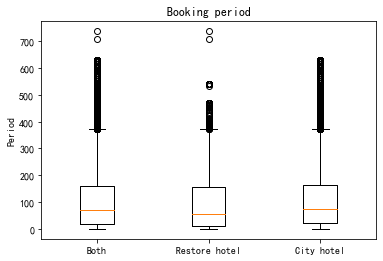

In [17]:
## 提前预订时长分析
lead_time_all = data_copy['lead_time']
lead_time_rh = data_copy.loc[data_copy['hotel_code']==1, 'lead_time']
lead_time_ch = data_copy.loc[data_copy['hotel_code']==0, 'lead_time']
lead_time = [lead_time_all, lead_time_rh, lead_time_ch]

# 可视化
labels = ['Both', 'Restore hotel', 'City hotel']

fig, ax = plt.subplots()

ax.boxplot(lead_time)

ax.set_xticklabels(labels)
ax.set_ylabel('Period')
ax.set_title('Booking period')

plt.show()

城市酒店的平均提前预定时间大于假日酒店，在75%-100%分位之后的值分布种，城市酒店预定时长分布更加均匀，可能是由于假日酒店顾客种类单一，一般都会做好提前订酒店的打算，而城市酒店可能有较多临时情况的发生。
### 3.2 入住时长
入住时长=周末过夜数+工作日过夜数

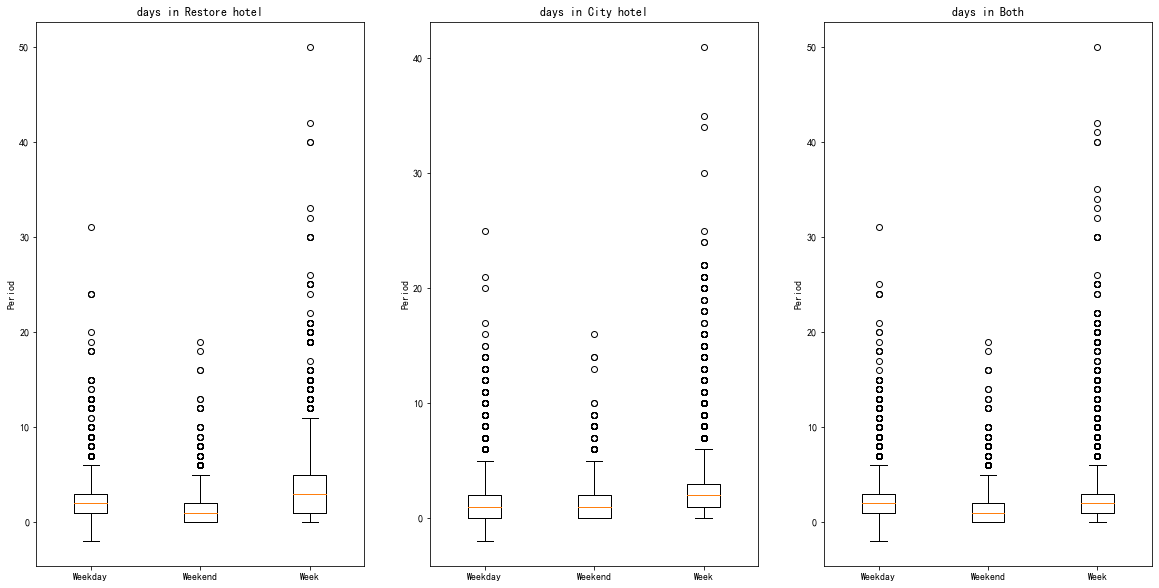

In [18]:
# 假日酒店入住时长
days_weekday_rh = data_copy.loc[data_copy['hotel_code']==1, 'stays_in_weekday_nights']
days_weekend_rh = data_copy.loc[data_copy['hotel_code']==1, 'stays_in_weekend_nights']
days_week_rh = data_copy.loc[data_copy['hotel_code']==1, 'stays_in_week_nights']
days_rh = [days_weekday_rh, days_weekend_rh, days_week_rh]

# 城市酒店入住时长
days_weekday_ch = data_copy.loc[data_copy['hotel_code']==0, 'stays_in_weekday_nights']
days_weekend_ch = data_copy.loc[data_copy['hotel_code']==0, 'stays_in_weekend_nights']
days_week_ch = data_copy.loc[data_copy['hotel_code']==0, 'stays_in_week_nights']
days_ch = [days_weekday_ch, days_weekend_ch, days_week_ch]
# 总的入住时长
days_weekday_all = data_copy['stays_in_weekday_nights']
days_weekend_all = data_copy['stays_in_weekend_nights']
days_week_all = data_copy['stays_in_week_nights']
days_all = [days_weekday_all, days_weekend_all, days_week_all]

# 入住时长可视化

fig, axs = plt.subplots(1, 3,figsize=(20,10))
labels = ['Weekday', 'Weekend', 'Week']

# 假日酒店
axs[0].boxplot(days_rh)
axs[0].set_xticklabels(labels)
axs[0].set_ylabel('Period')
axs[0].set_title('days in Restore hotel')

# 城市酒店
axs[1].boxplot(days_ch)
axs[1].set_xticklabels(labels)
axs[1].set_ylabel('Period')
axs[1].set_title('days in City hotel')

# 总的入住时长
axs[2].boxplot(days_all)
axs[2].set_xticklabels(labels)
axs[2].set_ylabel('Period')
axs[2].set_title('days in Both')
plt.show()

假日酒店周一-周五的平均入住时长明显高于周六周日的入住时长，在城市酒店中两者相差不明显。可能是由于游客选择在假期出游，假日酒店的入住时长连续较长，导致时长多于周六周日。而选择城市酒店的客户大多为事务所需，工作日入住时长并无太大差距。
### 3.3 预定间隔

In [19]:
data_copy['days_in_waiting_list'].describe()

count    119390.000000
mean          2.321149
std          17.594721
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         391.000000
Name: days_in_waiting_list, dtype: float64

平均预定间隔为2，最小值为0，最大值为391，多数时间很短。
### 3.4 餐食预订情况

Text(0.5, 1.0, 'Uncanceled')

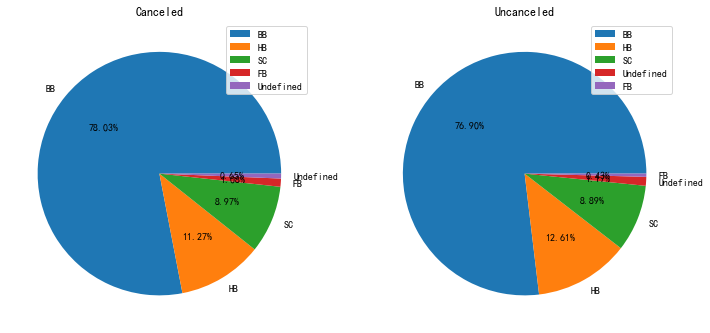

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.pie(data_copy[data_copy['is_canceled'] == 1].meal.value_counts(),
        labels=data_copy[data_copy['is_canceled'] == 1].meal.value_counts().index,
        autopct="%.2f%%")
plt.legend(loc=1)
plt.title('Canceled')
plt.subplot(122)
plt.pie(data_copy[data_copy['is_canceled'] == 0].meal.value_counts(),
        labels=data_copy[data_copy['is_canceled'] == 0].meal.value_counts().index,
        autopct="%.2f%%")
plt.legend(loc=1)
plt.title('Uncanceled')

- 上图统计了餐食类型对取消预订的关系，表明无论是否取消，餐食类型间差异不大。下面考虑不同酒店类型的餐食分布情况。

In [21]:
data_copy['meal'].value_counts(),data_copy['meal_code'].value_counts(sort=False)

(BB           92310
 HB           14463
 SC           10650
 Undefined     1169
 FB             798
 Name: meal, dtype: int64,
 0    92310
 1      798
 2    14463
 3    10650
 4     1169
 Name: meal_code, dtype: int64)

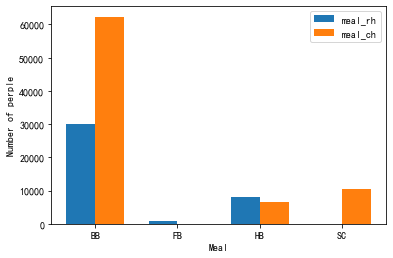

In [22]:
# 餐食预订分析
labels = ['BB','FB','HB','SC' ]
meal_rh = data_copy.loc[data_copy['hotel_code']==1,'meal'].value_counts(sort=False)
meal_ch = data_copy.loc[data_copy['hotel_code']==0,'meal'].value_counts(sort=False)
meal_rh.drop('Undefined',inplace=True)# 删除假日酒店多余的Undefined属性
df = pd.DataFrame({'meal_rh':meal_rh,'meal_ch':meal_ch})
meal_rh = df['meal_rh'].to_list()
meal_ch = df['meal_ch'].to_list()

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rect1 = ax.bar(x-width/2, meal_rh, width, label='meal_rh')
rect2 = ax.bar(x+width/2, meal_ch, width, label='meal_ch')

ax.set_ylabel('Number of perple')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Meal')
ax.legend()
plt.show()

不论是城市酒店还是假日酒店，只订早餐的客户都占比最多，其中假日酒店更多的客户选择订早晚餐和三餐，城市酒店客户更多不订餐食。可能的原因是度假客户长期性居住酒店从而预订早晚甚至三餐，而城市酒店客户多为事务所需而短暂停留，从而只预订早餐居多。
## 4. 一年中最佳预订时间
- 根据预订人数多少确定最佳预订时间

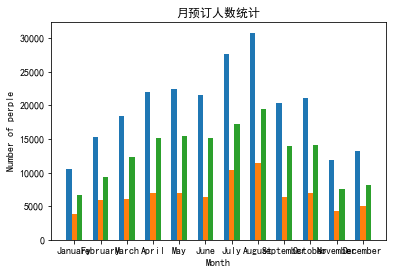

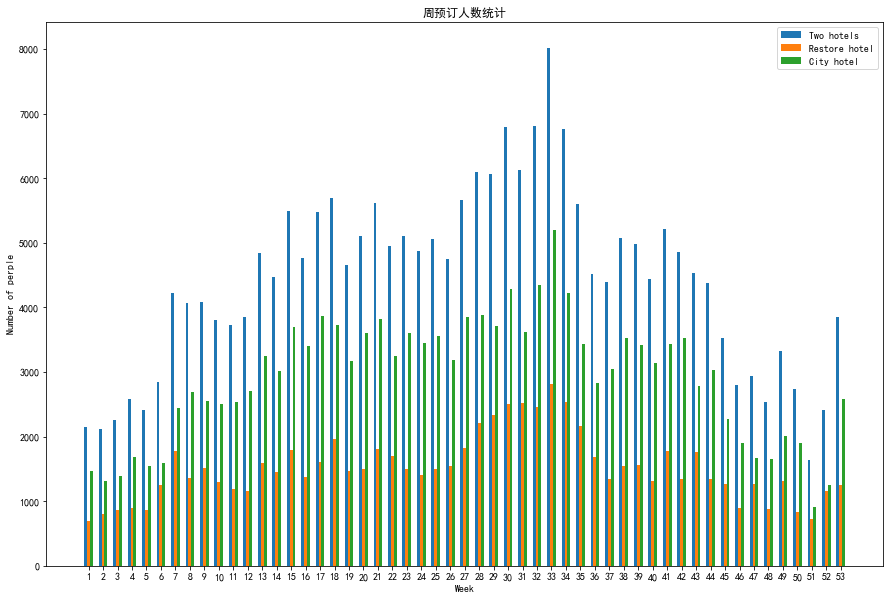

In [23]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# 按月份分别计算预订人数
people = ['adults','children','babies']
booking_time_per_month = data_copy.groupby(by='arrival_date_month')[people].sum().sum(axis=1)[new_order]
booking_time_per_month_rh = data_copy.loc[data_copy['hotel_code']==1, :].groupby(by='arrival_date_month')[people].sum().sum(axis=1)[new_order]
booking_time_per_month_ch = data_copy.loc[data_copy['hotel_code']==0, :].groupby(by='arrival_date_month')[people].sum().sum(axis=1)[new_order]
df = pd.DataFrame({'month':booking_time_per_month,'rh':booking_time_per_month_rh,'ch':booking_time_per_month_ch})
booking_time_per_month = df['month'].to_list()
booking_time_per_month_rh = df['rh'].to_list()
booking_time_per_month_ch = df['ch'].to_list()
# 按月份可视化预订时间
x = np.arange(len(new_order))
width = 0.2
fig, ax = plt.subplots()

ax.bar(x-width, booking_time_per_month, width, label='Both')
ax.bar(x, booking_time_per_month_rh, width, label='Restore hotel')
ax.bar(x+width, booking_time_per_month_ch, width, label='City hotel')

ax.set_title('月预订人数统计')
ax.set_xticks(x)
ax.set_xticklabels(new_order)
ax.set_xlabel('Month')
ax.set_ylabel('Number of perple')
plt.show()

# 按周数分别计算预订人数
booking_time_per_week = data_copy.groupby(by='arrival_date_week_number')[people].sum().sum(axis=1).to_list()
booking_time_per_week_rh = data_copy.loc[data_copy['hotel_code']==1, :].groupby(by='arrival_date_week_number')[
    people].sum().sum(axis=1).to_list()
booking_time_per_week_ch = data_copy.loc[data_copy['hotel_code']==0, :].groupby(by='arrival_date_week_number')[
    people].sum().sum(axis=1).to_list()

# 按照周数可是化预订人数
labels = list(np.arange(1, 54, 1))
x = np.arange(len(labels))
width = 0.2
fig, ax = plt.subplots(figsize=(15,10))

ax.bar(x-width, booking_time_per_week, width, label='Two hotels')
ax.bar(x, booking_time_per_week_rh, width, label='Restore hotel')
ax.bar(x+width, booking_time_per_week_ch, width, label='City hotel')

ax.set_title('周预订人数统计')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Week')
ax.set_ylabel('Number of perple')
ax.legend()

plt.show()

通过绘制不同酒店类型在每月，每周的预定人数统计，观察后得到如下结论：

从月预订人数看，
- 总体上预订人数在7，8月达到最大，并逐次向两端递减
- 城市酒店的最佳预订时间为1，2，11，12月，期间预订人数较少
- 假日酒店的最佳预订时间为1，11月，可能由于这两个月为旅游淡季，不过整体上看假日酒店的全年预订量基本保持均衡

从周预订人数看，
- 年末的最后两周预订率较之前有小幅度增长，可能由于度假或年末事务频繁导致


## 5.预测酒店预订
- 选取一些与客户预订有关的属性作为特征，将数据分为训练集和测试集
- 将数据进行特征缩放后使用LogisticRegression进行模型训练和数据预测，得到预测准确率为98.8%

In [24]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [25]:
import seaborn as sns

<AxesSubplot:>

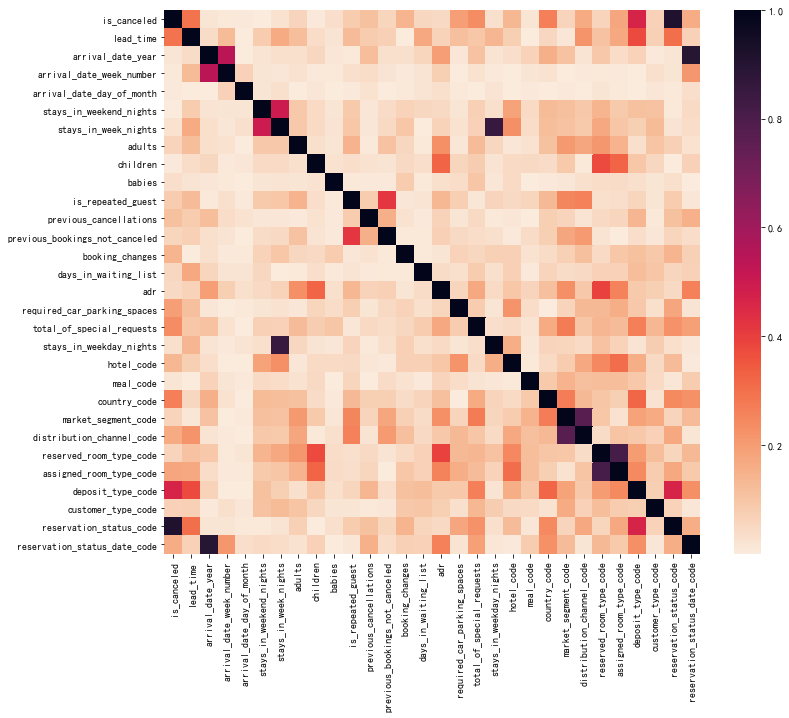

In [26]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_copy.corr().abs(), cmap=sns.cm.rocket_r)

观察热力图发现，提前预定时长，车位需求，特殊需求，押金类型，预订状态这5个属性与取消预订高相关

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

col = [2, 3] + list(np.arange(5, 12, 1)) + [16, 17, 18, 21, 23, 25, 26, 27] + list(np.arange(31, 42, 1))

feature_colums = [data_copy.columns.to_list()[i] for i in col]
X = data_copy[feature_colums]
y = data_copy['is_canceled']
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)


# 特征缩放
std_sca = StandardScaler()
Xtrain = std_sca.fit_transform(Xtrain)

# 引入模型
MLA = [
    # 线性回归
    LogisticRegression(max_iter=1000)]# ,n_jobs=-1, random_state=42
MLA_columns = [
    'MLA Name', 'Train Accuracy Mean', 'Test Accuracy Mean', 'Test F1 Score', 'Time'
]
MLA_compare = pd.DataFrame(np.zeros([len(MLA), len(MLA_columns)]), columns=MLA_columns)
row_index = 0
for alg in MLA:
    MLA_compare.iloc[row_index, 0] = alg.__class__.__name__
    cv_results = cross_validate(alg, X, y, scoring=('accuracy', 'f1'),
                                cv=3, return_train_score=True)
    MLA_compare.iloc[row_index, 1] = round(cv_results['train_accuracy'].mean() * 100, 3)
    MLA_compare.iloc[row_index, 2] = round(cv_results['test_accuracy'].mean() * 100, 3)
    MLA_compare.iloc[row_index, 3] = round(cv_results['test_f1'].mean() * 100, 3)
    MLA_compare.iloc[row_index, 4] = cv_results['fit_time'].mean()
    row_index += 1

D:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

In [28]:
MLA_compare

,MLA Name,Train Accuracy Mean,Test Accuracy Mean,Test F1 Score,Time
0,LogisticRegression,98.953,98.858,98.438,6.109653
